In [2]:
import json
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
### 为了寻找可用中文字体
import matplotlib as mpl

def intersection_fclistzh_entry(fontEntries):
    _fs = [t.name for t in fontEntries if t.fname in zhsfn]
    # _fs = sorted(_fs, key=lambda f: f[1])
    # _fs.reverse()
    return list(set(_fs))  # 去重

fm = mpl.font_manager.FontManager()
chinese_fonts = intersection_fclistzh_entry(fm.ttflist)
print(chinese_fonts)

Matplotlib is building the font cache; this may take a moment.


NameError: name 'zhsfn' is not defined

## 简单可视化

In [5]:
jsonl_file = 'data/书宋.jsonl'

data = []
with open(jsonl_file, 'r') as f:
    for line in f:
        line_data = json.loads(line)
        grayscales = line_data.pop('grayscale')
        for k, v in grayscales.items():
            data.append({**line_data, 'master': k, 'grayscale': v})
df = pd.DataFrame(data)
df.head()

,id,string,unicode,master,grayscale
0,space,,20,Light,0.000000
1,uni554A,啊,554a,Light,0.280475
2,uni963F,阿,963f,Light,0.247016
3,uni57C3,埃,57c3,Light,0.230572
4,uni6328,挨,6328,Light,0.249041


In [6]:
# Filter out non-Hanzi characters and sort by grayscale
hanzi_re = re.compile(u'[⺀-⺙⺛-⻳⼀-⿕々〇〡-〩〸-〺〻㐀-䶵一-鿃豈-鶴侮-頻並-龎]', re.UNICODE)
df_hanzi = df[df['string'].str.match(hanzi_re, na=False)]
df_sorted = df_hanzi.sort_values('grayscale').reset_index(drop=True)
df_sorted

,id,string,unicode,master,grayscale
0,uni2F00,一,4e00,Light,0.029552
1,uni2F02,丶,4e36,Light,0.030774
2,uni2F07,亠,4ea0,Light,0.045614
3,uni2F06,二,4e8c,Light,0.051958
4,uni2F0D,冖,5196,Light,0.052637
...,...,...,...,...,...
6758,uni9B49,魉,9b49,Light,0.333621
6759,uni8832,蠲,8832,Light,0.335134
6760,uni5B32,嬲,5b32,Light,0.341447
6761,uni9EFC,黼,9efc,Light,0.345417


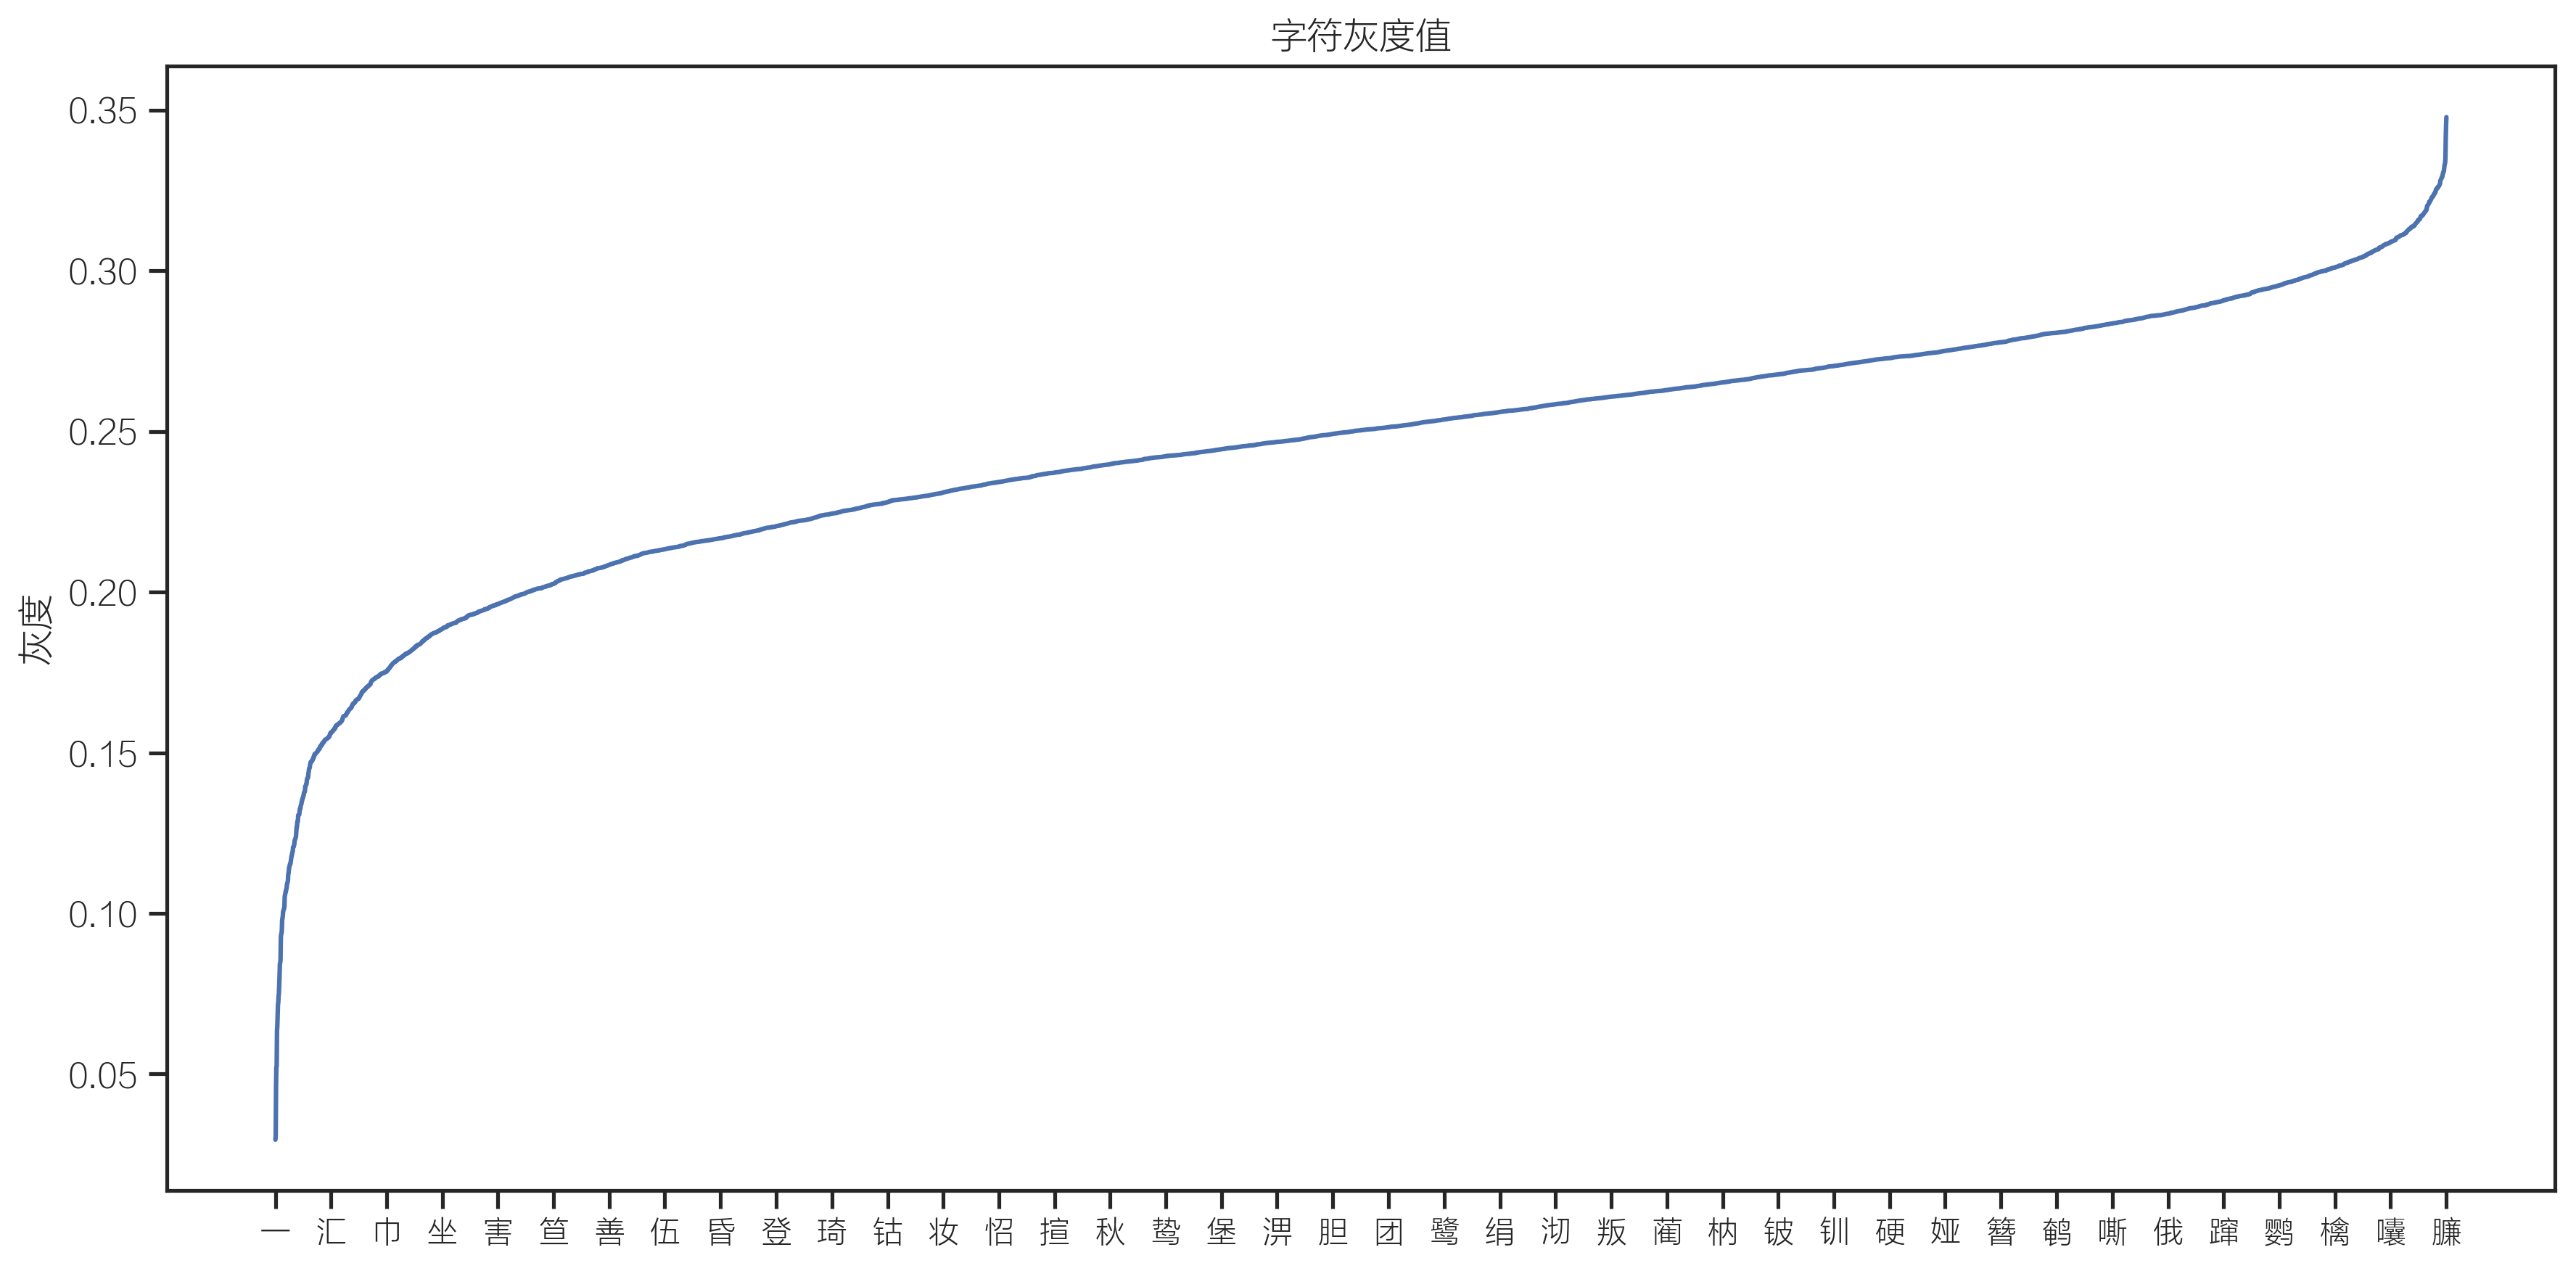

In [7]:
# Select evenly spaced labels to show on x-axis
n_labels = 40
label_indices = np.linspace(0, len(df_sorted) - 1, n_labels, dtype=int)

# Plot settings and font
sns.set_theme(style='ticks', rc={
    'font.family': 'FZLanTingKanHei-R-GBK',
    # 'axes.facecolor': 'white',
    # 'axes.edgecolor': 'dimgray',
    # 'axes.grid': False,
    # 'xtick.color': 'dimgray',
    # 'ytick.color': 'dimgray',
    # 'text.color': 'dimgray',
    # 'axes.labelcolor': 'dimgray',
    # 'axes.spines.top': False,
    # 'axes.spines.right': False,
    'figure.dpi': 300,
})

fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=range(len(df_sorted)), y=df_sorted['grayscale'], ax=ax)

# Set x-ticks to show only selected glyph strings
ax.set_xticks(label_indices)
ax.set_xticklabels(df_sorted.iloc[label_indices]['string'], fontsize=10)

ax.set_ylabel('灰度')
ax.set_title('字符灰度值', fontproperties={'weight': 'bold'})
fig.tight_layout();

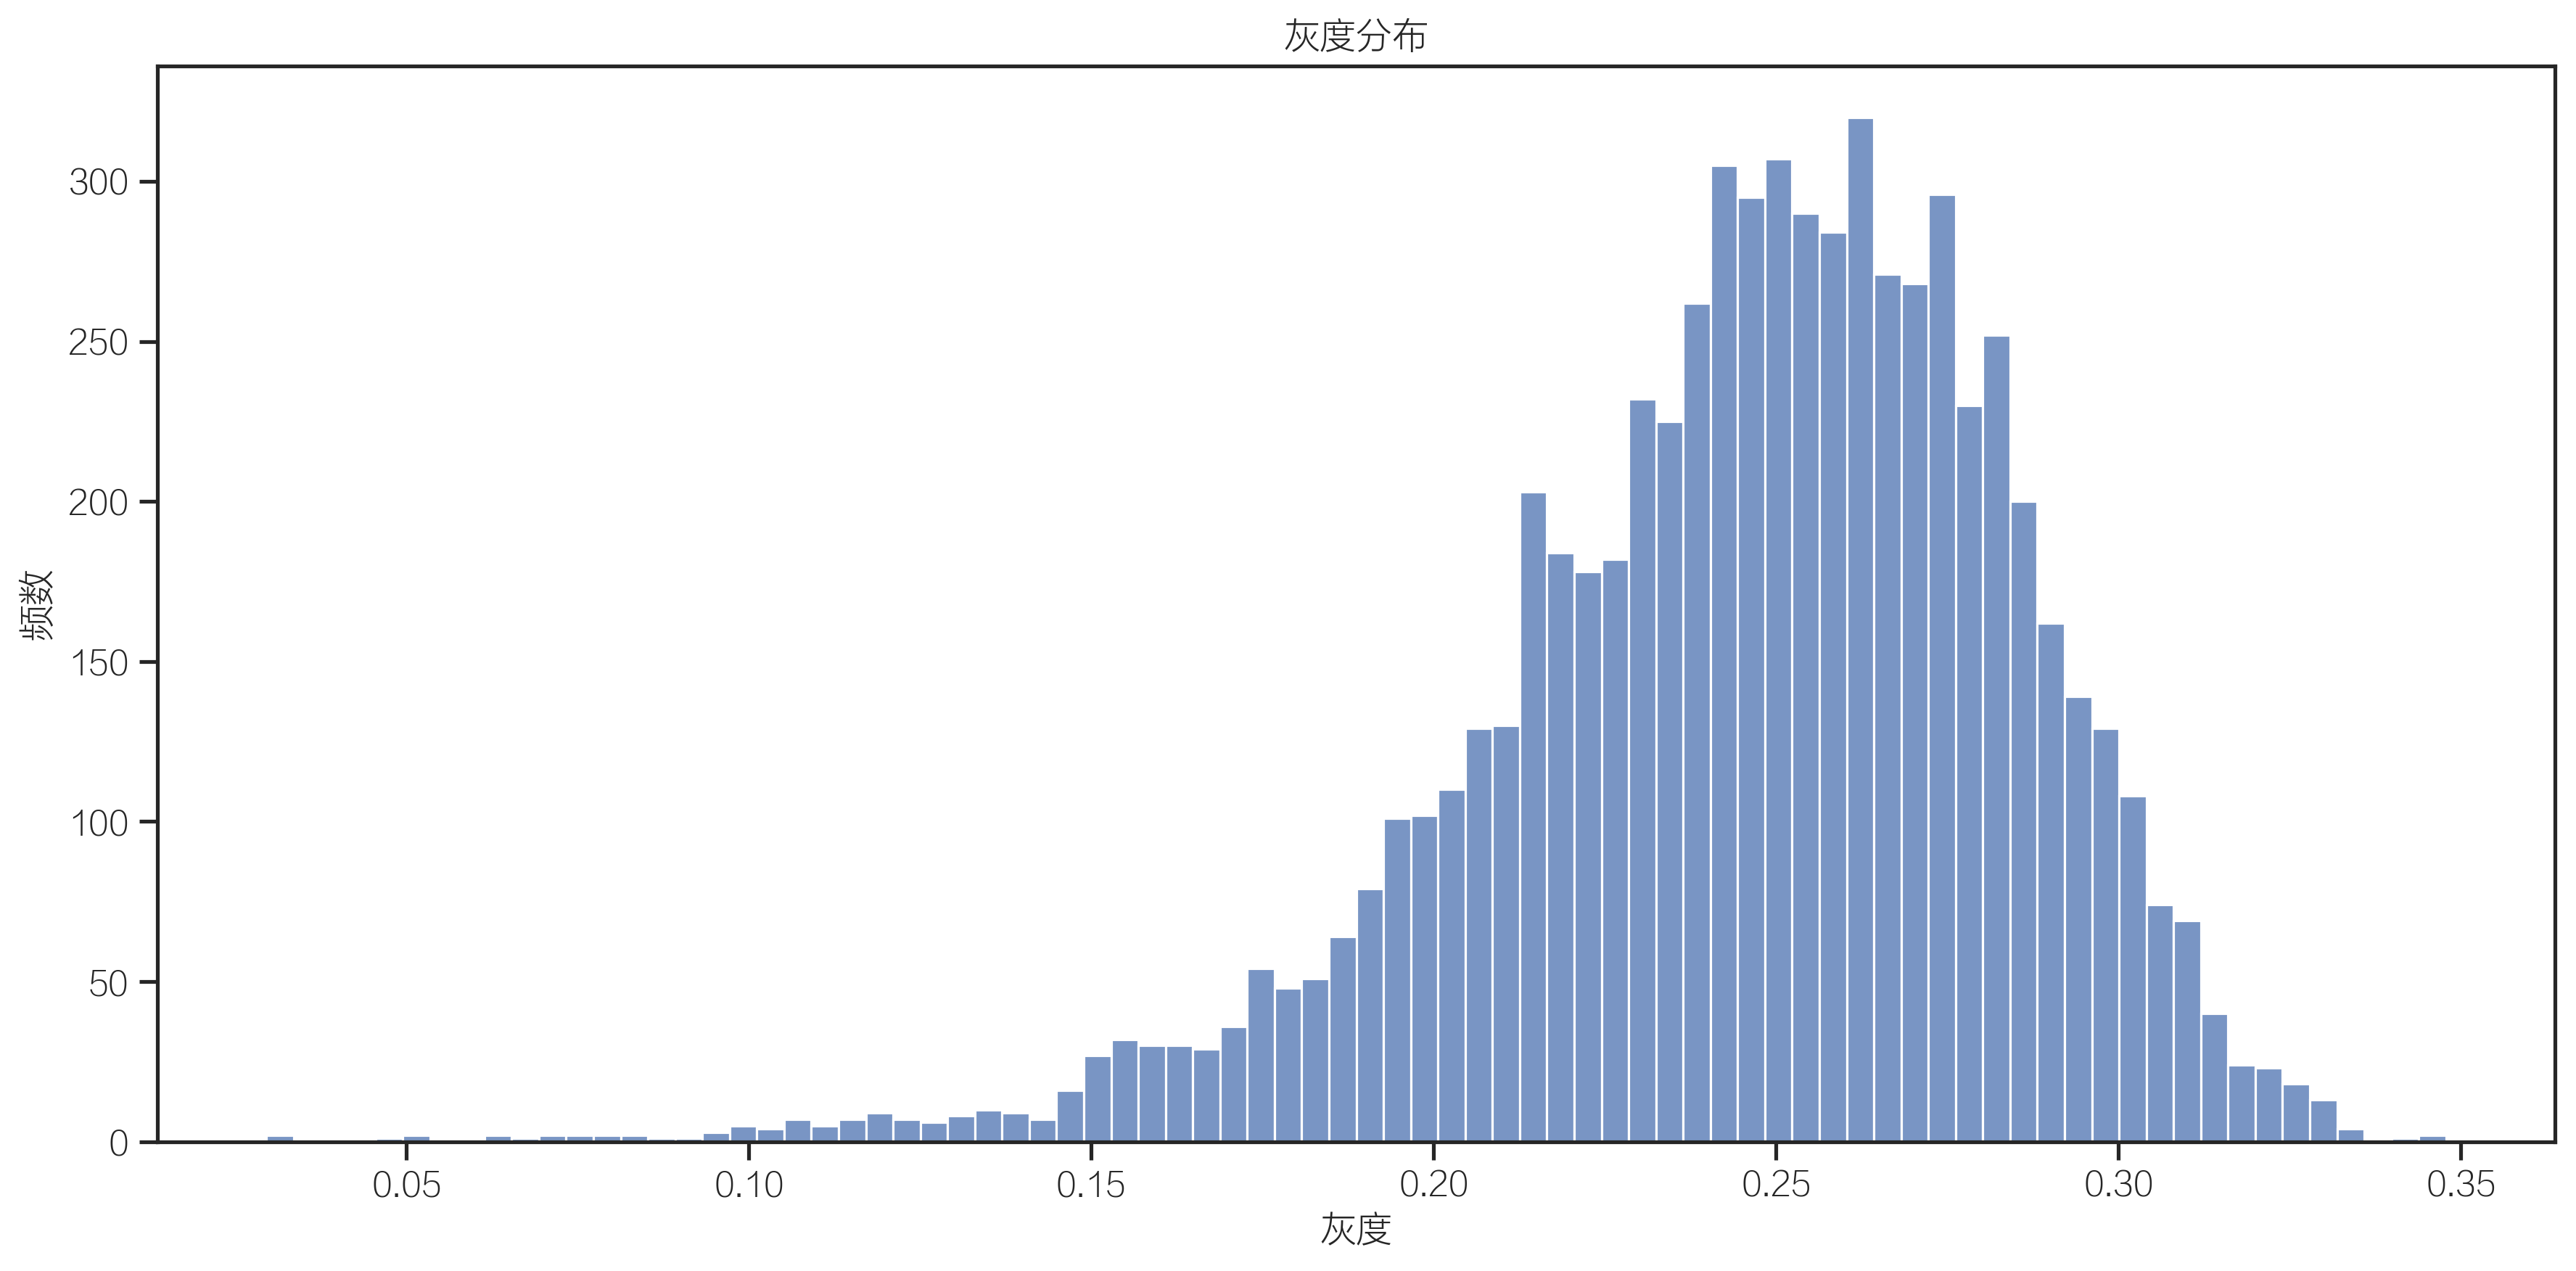

In [8]:
# Frequency distribution of grayscale values
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df_sorted, x='grayscale', bins=80, ax=ax)

ax.set_xlabel('灰度')
ax.set_ylabel('频数')
ax.set_title('灰度分布', fontproperties={'weight': 'bold'})
fig.tight_layout();

## 不同字体对比

In [5]:
def load_jsonl_to_df(jsonl_file: str, filter_chinese: bool = True, sort: bool = True) -> pd.DataFrame:
    '''
    Process a JSONL file and return a DataFrame of grayscale values.
    
    Args:
        jsonl_file (str): The path to the JSONL file.
        filter_chinese (bool): Whether to filter out non-Chinese characters.
    '''
    hanzi_re = re.compile(u'[⺀-⺙⺛-⻳⼀-⿕々〇〡-〩〸-〺〻㐀-䶵一-鿃豈-鶴侮-頻並-龎]', re.UNICODE)

    data = []
    with open(jsonl_file, 'r') as f:
        for line in f:
            line_data = json.loads(line)
            char = line_data['string']
            if not char:
                continue
            if filter_chinese and not hanzi_re.match(char):
                continue
            grayscales = line_data.pop('grayscale')
            for k, v in grayscales.items():
                data.append({**line_data, 'master': k, 'grayscale': v})
    
    df = pd.DataFrame(data)
    if sort:
        df = df.sort_values('grayscale').reset_index(drop=True)
    return df


jsonl_file = 'data/书宋.jsonl'
df = load_jsonl_to_df(jsonl_file)
df.head()

,id,string,unicode,master,grayscale
0,uni2F00,一,4e00,Light,0.029552
1,uni2F02,丶,4e36,Light,0.030774
2,uni2F07,亠,4ea0,Light,0.045614
3,uni2F06,二,4e8c,Light,0.051958
4,uni2F0D,冖,5196,Light,0.052637


In [ ]:
jsonl_files = ['data/书宋.jsonl', 'data/OPPO Sans.jsonl']